### ***Importações***

In [89]:
import numpy as np
import pandas as pd
import platform
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

platform.python_version()

'3.9.12'

### ***Realizando a leitura do arquivo csv organizado no Trabalho 02 para utilizar o modelo de Classificação***

In [90]:
softwares_maliciosos = pd.read_csv('algoritmo.csv', encoding='utf8', delimiter=',', header=0)
softwares_maliciosos

,Sintoma01,Sintoma02,Sintoma03,Sintoma04,Sintoma05,Sintoma06,Sintoma07,Sintoma08,Sintoma09,Sintoma10,...,Sintoma14,Sintoma15,Sintoma16,Sintoma17,Sintoma18,Sintoma19,Sintoma20,Sintoma21,Sintoma22,MLC
0,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,0,1,...,0,0,1,1,0,0,0,0,0,1
2,1,0,1,1,1,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,1
3,1,0,1,1,1,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,1
4,1,0,1,1,1,0,1,1,0,1,...,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,1,1,0,0,1,1,0,0,...,0,0,1,1,1,1,1,1,1,5
66,0,0,1,1,0,0,1,1,0,0,...,0,0,1,1,1,1,1,1,1,5
67,0,0,1,1,0,0,1,1,0,0,...,0,0,1,1,1,1,1,1,1,5
68,0,0,1,1,0,0,1,1,0,0,...,0,0,1,1,1,1,1,1,1,5


### ***Divisão entre os Atributos e Rótulos.***

In [91]:
X = softwares_maliciosos.drop('MLC', axis = 1)
y = softwares_maliciosos.MLC

### ***Dividindo entre Treino e Teste.***

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### ***Verificando a Acurácia no Teste, usando o Predict.***

In [135]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9444444444444444

### ***Verificando o resultado com o Score.***

In [116]:
model.score(X_test,y_test)

0.9444444444444444

### ***Métrica Escolhida foi a Acurácia, por melhor se adaptar ao meu problema.***

In [117]:
acuracia_treino = model.score(X_train, y_train)
print("Acurácia no Treino = {:0.2f}".format(acuracia_treino))
acuracia_teste = model.score(X_test, y_test)
print("Acurácia no Teste = {:0.2f}".format(acuracia_teste))

Acurácia no Treino = 1.00
Acurácia no Teste = 0.94


### ***Utilizando a Matrix de Confusão para Mostrar os Valores Reais que o Algoritmo Acertou na Diagonal.***

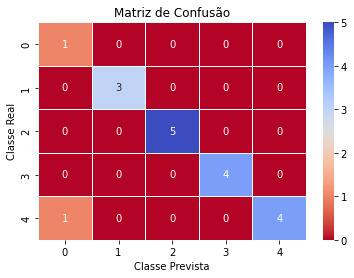


------------------- Relatorio de Classificação -------------------
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4
           5       1.00      0.80      0.89         5

    accuracy                           0.94        18
   macro avg       0.90      0.96      0.91        18
weighted avg       0.97      0.94      0.95        18



In [136]:
model = confusion_matrix(y_test, y_pred)

sn.heatmap(model, cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()
print('\n------------------- Relatorio de Classificação -------------------')
print(classification_report(y_test, y_pred, zero_division=0)) 